<a href="https://colab.research.google.com/github/RaianaSeixas/Portfolio/blob/main/Machine-Learning_sklearn/Boston_Housing_ANN_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this code we will use the **Boston Housing Dataset** from sklearn.
There are 506 samples and 13 feature variables in this dataset. The objective is to predict the value of prices of the house using the given features.
In order to solve this **regression problem**, we will use a **Multi-layer Perceptron Artificial Neural Network** of feedforward type (also available in sklearn library), which optimizes the squared error using LBFGS or stochastic gradient descent .

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.datasets import load_boston
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [81]:
dat = load_boston()
names=dat.feature_names
values=dat.data

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [82]:
#dat.DESCR

In [83]:
df = pd.DataFrame(values, columns=names)

In [84]:
df.head(2) #features dataframe
'''
DESCRIPTION OF THE FEATURES (boston_dataset.DESCR)

CRIM: Per capita crime rate by town
ZN: Proportion of residential land zoned for lots over 25,000 sq. ft
INDUS: Proportion of non-retail business acres per town
CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
NOX: Nitric oxide concentration (parts per 10 million)
RM: Average number of rooms per dwelling
AGE: Proportion of owner-occupied units built prior to 1940
DIS: Weighted distances to five Boston employment centers
RAD: Index of accessibility to radial highways
TAX: Full-value property tax rate per $10,000
PTRATIO: Pupil-teacher ratio by town
B: 1000(Bk — 0.63)², where Bk is the proportion of [people of African American descent] by town
LSTAT: Percentage of lower status of the population
'''

'\nDESCRIPTION OF THE FEATURES (boston_dataset.DESCR)\n\nCRIM: Per capita crime rate by town\nZN: Proportion of residential land zoned for lots over 25,000 sq. ft\nINDUS: Proportion of non-retail business acres per town\nCHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\nNOX: Nitric oxide concentration (parts per 10 million)\nRM: Average number of rooms per dwelling\nAGE: Proportion of owner-occupied units built prior to 1940\nDIS: Weighted distances to five Boston employment centers\nRAD: Index of accessibility to radial highways\nTAX: Full-value property tax rate per $10,000\nPTRATIO: Pupil-teacher ratio by town\nB: 1000(Bk — 0.63)², where Bk is the proportion of [people of African American descent] by town\nLSTAT: Percentage of lower status of the population\n'

In [85]:
df.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14


In [86]:
df['PRICE'] = dat.target # This step was not necessary, considering we need features and  target separated to feed the solver. It was done just to get a general code that would work when features and target are together.
# Price is given in terms of median value of owner-occupied homes in $1000s

In [87]:
df.describe() # Statistical Description of the entire dataset

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [88]:
# Data preprocessing

df.isnull().sum() # Check if there are missing data

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


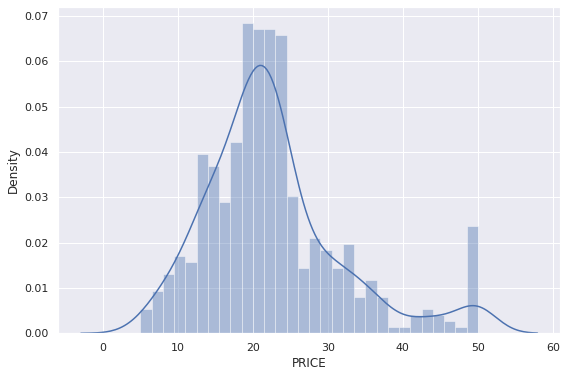

Price values are approximately normally distributed, with few outliers.


In [89]:
# Exploratory Data Analysis

import seaborn as sns
sns.set(rc={'figure.figsize':(9,6)})
sns.distplot(df['PRICE'], bins=30)
plt.show()
print('Price values are approximately normally distributed, with few outliers.')

In [90]:
#Split target from features

y=df['PRICE'].ravel()
X= df.drop('PRICE', axis=1)

In [91]:
# Normalization data between -1,1

y=np.reshape(y, (-1,1)) # put in the format accepted from the library
scaler_x = MinMaxScaler().fit(X)
scaler_y = MinMaxScaler().fit(y)
xscale=scaler_x.transform(X)
yscale=scaler_y.transform(y)

In [92]:
#Split data in train and test

X_train, X_test, y_train, y_test = train_test_split(xscale, yscale,test_size=0.3,random_state=0) # 30% test

In [93]:
# Model building and training

'''Here there are some options of hyperparameters with R2 values. A better strategy is to use the package GridSearchCV to optimize this parameters  '''
# regr = MLPRegressor(alpha=1e-05, hidden_layer_sizes=(12,), random_state=1,solver='lbfgs') # r^2= 0.7763538700052035
# regr = MLPRegressor(alpha=1e-05, hidden_layer_sizes=(12,), random_state=1,solver='adam') # r^2= 0.431237181771727
# regr = MLPRegressor(alpha=1e-05, hidden_layer_sizes=(16,), random_state=1,solver='lbfgs') # r^2= 0.8127490244812298
regr = MLPRegressor(alpha=1e-05, hidden_layer_sizes=(16,), random_state=1,solver='lbfgs', max_iter=500) # r^2= 0.8165...

regr.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPRegressor(alpha=1e-05, hidden_layer_sizes=(16,), max_iter=500,
             random_state=1, solver='lbfgs')

In [94]:
# Model performance for testing set 

y_calc=regr.predict(X_test)
y_calc=np.array(pd.DataFrame(y_calc))
y_test=np.array(pd.DataFrame(y_test))
r2=r2_score(y_test, y_calc)
MSE=mean_squared_error(y_test, y_calc)
print('Mean squared error (MSE) =',MSE)
print('Coefficient of determination (r2) =',r2)

Mean squared error (MSE) = 0.007544605710612931
Coefficient of determination (r2) = 0.8165167294712757


The developed model showed a good performance, considering that more than 80% of the variation of the prices can be explained by the features, and the mean squared error is small